<a href="https://colab.research.google.com/github/Long-1234kfgkl/CS114.K21/blob/master/Time_and_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [0]:
dataset = pd.read_csv("https://cs.uit.edu.vn/data.txt",sep=' ',delimiter=',')
dataset.columns=["Size","Time"]

In [0]:
import math
df=pd.DataFrame(dataset)
Size2=[(df['Size'][i])**2 for i in range(len(dataset))]
Sizelog=[df['Size'][i]*math.log2(df['Size'][i]) for i in range(len(dataset))]
df['Size2']=Size2
df['Sizelog']=Sizelog

In [159]:
dataset.shape

(5210, 4)

In [160]:
dataset.head()

,Size,Time,Size2,Sizelog
0,2055486,0.509774,4225022696196,4.310570e+07
1,5626651,1.476080,31659201475801,1.261712e+08
2,42065,0.007651,1769464225,6.461324e+05
3,6297788,1.661560,39662133692944,1.422444e+08
4,8871407,2.653120,78701862159649,2.047586e+08


In [161]:
dataset.describe()

,Size,Time,Size2,Sizelog
count,5.210000e+03,5210.000000,5.210000e+03,5.210000e+03
mean,4.991767e+06,1.363353,3.334798e+13,1.124832e+08
std,2.903765e+06,0.825925,2.997971e+13,6.823263e+07
min,2.390000e+02,0.000028,5.712100e+04,1.888307e+03
25%,2.450926e+06,0.630406,6.007039e+12,5.202065e+07
50%,5.033683e+06,1.355880,2.533797e+13,1.120658e+08
75%,7.523688e+06,2.076855,5.660587e+13,1.718637e+08
max,9.995358e+06,3.315540,9.990718e+13,2.324203e+08


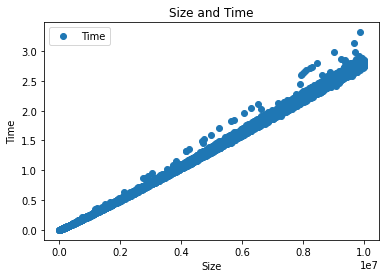

In [162]:
dataset.plot (x = 'Size', y = 'Time', style = 'o')
plt.title ( 'Size and Time')   
plt.xlabel ( 'Size')   
plt.ylabel ( 'Time') 
plt.show()

In [0]:
X = dataset[['Size','Size2','Sizelog']]
y = dataset['Time'].values.reshape(-1,1)

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [165]:
regressor = LinearRegression(fit_intercept=True)  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [167]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1.718650,1.715441
1,2.618280,2.618098
2,0.687245,0.688035
3,0.985524,1.005951
4,1.069790,1.069003
...,...,...
1037,1.210280,1.235400
1038,0.636834,0.632349
1039,1.203920,1.162617
1040,1.206750,1.191790


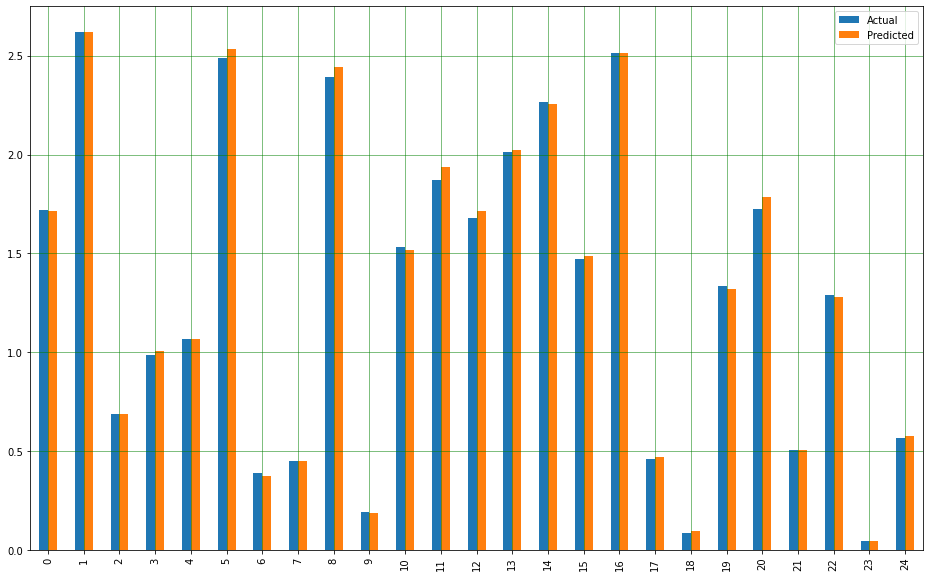

In [168]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [169]:
import sklearn.metrics as metrics
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.9978894458787916
0.9972595398157934


In [0]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [170]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02373893910019814
Mean Squared Error: 0.0018121521960262892
Root Mean Squared Error: 0.04256938096832381
